<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/%ED%9A%8C%EA%B7%80%EC%8B%9D(%EC%A7%81%EC%84%A0)%EC%9D%98_%EB%B6%84%EC%82%B0(%EB%B6%88%ED%99%95%EC%8B%A4%EC%84%B1)%EC%97%90_%EB%8C%80%ED%95%98%EC%97%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://seaborn.pydata.org/examples/multiple_regression.html

아래 그래프에서 보이는 직선 주변의 음영 처리된 부분은 신뢰구간(confidence interval)을 나타냅니다. 이것의 의미와 특징을 설명하겠습니다:
### **신뢰구간의 의미**


회귀선(직선)의 불확실성을 시각적으로 보여주는 영역입니다
데이터의 변동성과 예측의 정확도를 나타냅니다
일반적으로 95% 신뢰구간을 사용합니다


### **신뢰구간이 넓어지고 좁아지는 이유:**


데이터 밀도: 데이터 포인트가 많은 중앙 부분에서는 신뢰구간이 좁습니다
데이터 희소성: 데이터가 적은 양 끝단에서는 신뢰구간이 넓어집니다
예측의 불확실성: 관측치에서 멀어질수록 예측의 불확실성이 커져 구간이 넓어집니다


### **실제 그래프에서의 적용**


세 종류의 펭귄(Adelie, Chinstrap, Gentoo) 각각에 대해 신뢰구간이 표시되어 있습니다
각 종의 데이터 분포에 따라 신뢰구간의 폭이 다르게 나타납니다
특히 데이터의 양 끝단으로 갈수록 신뢰구간이 넓어지는 것을 볼 수 있습니다

이러한 신뢰구간은 통계적 모델의 예측력과 신뢰성을 평가하는 데 중요한 정보를 제공합니다.

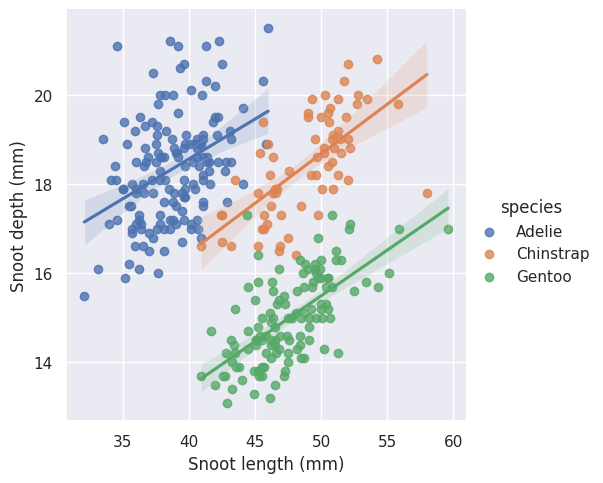

In [1]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [4]:
Gentoo = penguins[penguins['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm']]
Gentoo

,bill_length_mm,bill_depth_mm
220,46.1,13.2
221,50.0,16.3
222,48.7,14.1
223,50.0,15.2
224,47.6,14.5
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


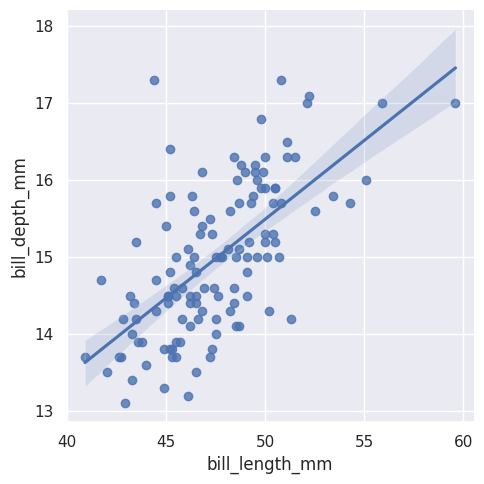

In [5]:
g = sns.lmplot(
    data=Gentoo,
    x="bill_length_mm", y="bill_depth_mm"
)

In [7]:
# prompt: 단순회귀분석 예측해주고 예측값의 분산을 보여줘

import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
Gentoo = penguins[penguins['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm']]

# Prepare the data for statsmodels
X = Gentoo['bill_length_mm']
y = Gentoo['bill_depth_mm']
# Drop rows with missing values in either X or y
# This ensures that there are no missing values or infinite values in the data
Gentoo = Gentoo.dropna()
X = Gentoo['bill_length_mm']
y = Gentoo['bill_depth_mm']
X = sm.add_constant(X)  # Add a constant for the intercept

# Fit the simple linear regression model
model = sm.OLS(y, X, missing='drop').fit() # or you can use missing='raise' to explicitly raise an error if missing data is present

# Make predictions
predictions = model.predict(X)

# Calculate the variance of the predictions
prediction_variance = np.var(predictions)

print(model.summary())
print(f"\nVariance of predictions: {prediction_variance}")

                            OLS Regression Results                            
Dep. Variable:          bill_depth_mm   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     85.46
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.02e-15
Time:                        08:02:58   Log-Likelihood:                -138.83
No. Observations:                 123   AIC:                             281.7
Df Residuals:                     121   BIC:                             287.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2510      1.055      4.